# Amtrack - Series de tiemp

![](https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png)

# Series de tiempo - Amtrack 

## Series de Tiempo y Análisis Topológicos de Datos

## Maestría en Ciencia de Datos
Profesores:
**Rosalía Guadalupe Hernadez Amador** y **Jesús Francisco Espinoza Fierro**, 2022

**Alumno: jose Luis Bracamonte Amavizca**

[Abrir en google Colab](https://colab.research.google.com/github/luisjba/time-series/blob/master/ts_decomposition.ipynb)

El presente trabajo es para analizar la serie de tiempo Amtrack que contiene los datos de pasajeros del sistema de transporte de Estados Unidos, por el ["Bureau of Transportation Statistics"](https://www.bts.gov/ctp). Los datos con lo que trabajaremos contienen el número de pasajeros desde Enero de 1991 a Marzo 2004. En el presente trabajo analizaremos la serie de tiempo y utilizaremos algunas técnicas de descomposición de componetes para la misma.

## Importando librerias

In [39]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
plt.style.use('ggplot')
mpl.style.use("seaborn")
plt.rcParams['figure.figsize'] = (20,10)
# extra import for interactive plot!
from ipywidgets import interact

### Importando los datos y haciendo un análisis exploratorio básico

Los datos están en la carpeta `data` en el archivo `Amtrak data.csv`, el cual contiene 158 registros con datos de pasajeros desde enero de 1991 a marzo del 2004. Las columnas para nuestro interés son `Month` y `Ridership`.

In [2]:

df = pd.read_csv("data/Amtrak data.csv")
df.tail()

,Month,Ridership,Amtrak Ridership Number of Passengers ( in thousands)
154,11/03,2076.054,NaN
155,12/03,2140.677,NaN
156,01/04,1831.508,NaN
157,02/04,1838.006,NaN
158,03/04,2132.446,NaN


In [3]:
df.describe()

,Ridership,Amtrak Ridership Number of Passengers ( in thousands)
count,159.000000,0.0
mean,1822.197208,NaN
std,181.636034,NaN
min,1360.852000,NaN
25%,1698.564500,NaN
50%,1831.049000,NaN
75%,1966.957500,NaN
max,2223.349000,NaN


El dataframe original contiene un formato de fecha diferente al que se requiere para la librerías de Python, por lo tanto necesitamos transofrmarlas a un formato de la fecha en la columna `Month`

In [8]:
df["dates"] = pd.to_datetime(df['Month'], format='%m/%y')
df.tail()

,Month,Ridership,Amtrak Ridership Number of Passengers ( in thousands),dates
154,11/03,2076.054,NaN,2003-11-01
155,12/03,2140.677,NaN,2003-12-01
156,01/04,1831.508,NaN,2004-01-01
157,02/04,1838.006,NaN,2004-02-01
158,03/04,2132.446,NaN,2004-03-01


Creamos un nuevo dataframe con las columnas de interés (`dates` y `Ridership`) y hacemos índice la columna que contiene el formato de tiempo. 

In [18]:
amtrak_ds = df[['dates','Ridership']].rename(columns={'dates':'Month'})
amtrak_ds.set_index('Month', inplace=True)

Text(0.5, 0, 'Mes')

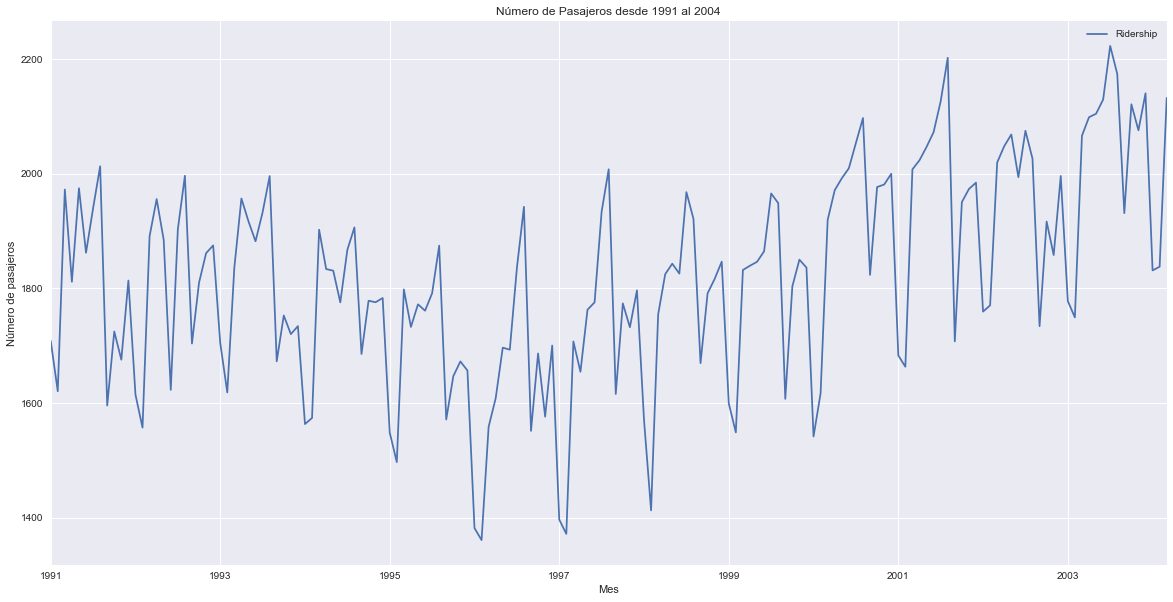

In [40]:
ax = amtrak_ds.plot(title="Número de Pasajeros desde 1991 al 2004")
ax.set_ylabel("Número de pasajeros")
ax.set_xlabel("Mes")

Como podemos observar en la gráfica de la serie de tiempo, se puede apreciar estacionalidad, a continuaci'on procederemos a hacer las diferentes descomposiciones en las diferentes componentes y métodos para analizar éstos datos en la serie de tiempo.

# Descomposición de la serie en sus componentes

Para descomponer la serie de tiempo, utilizaremos la libreria de `statsmodels` de Python,  usaremos la función [`seasonal_decompose`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html), la cual utiliza el método clásico de descomposición utilizando médias móviles. Éste metodo retorna un objeto `DecomposeResult` con los atributos `seasonal`, `trend`, `resid` para acceder a la estacionalidad, tendencia y la componente irregular respectivaente para la serie de tiempo.

In [44]:
classic_fit = seasonal_decompose(amtrak_ds.Ridership, model='additive')

Utilizando la función de plot, podemos visuzalizar todas las componentes en una sola gráfica. 

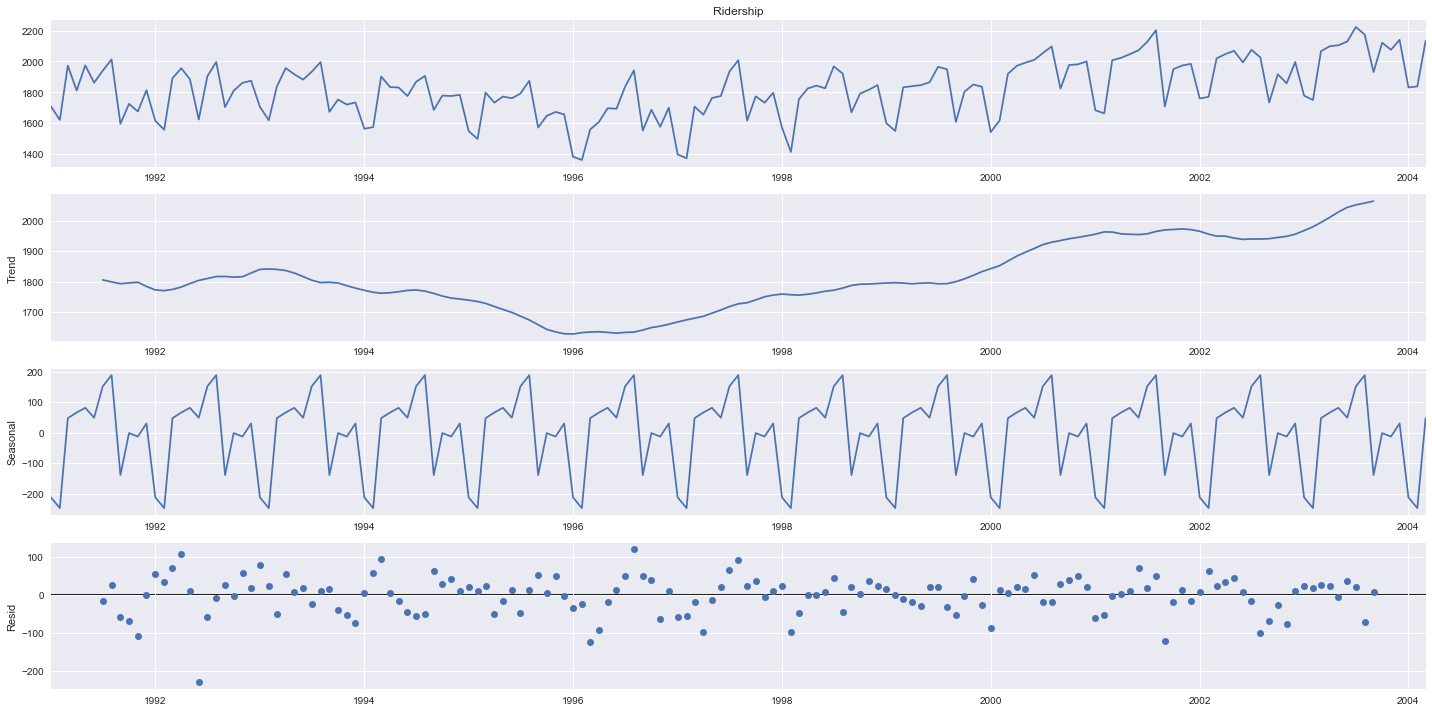

In [45]:
ax = classic_fit.plot()

Graficaremos la serie con la tendencia para observar su comportamiento.

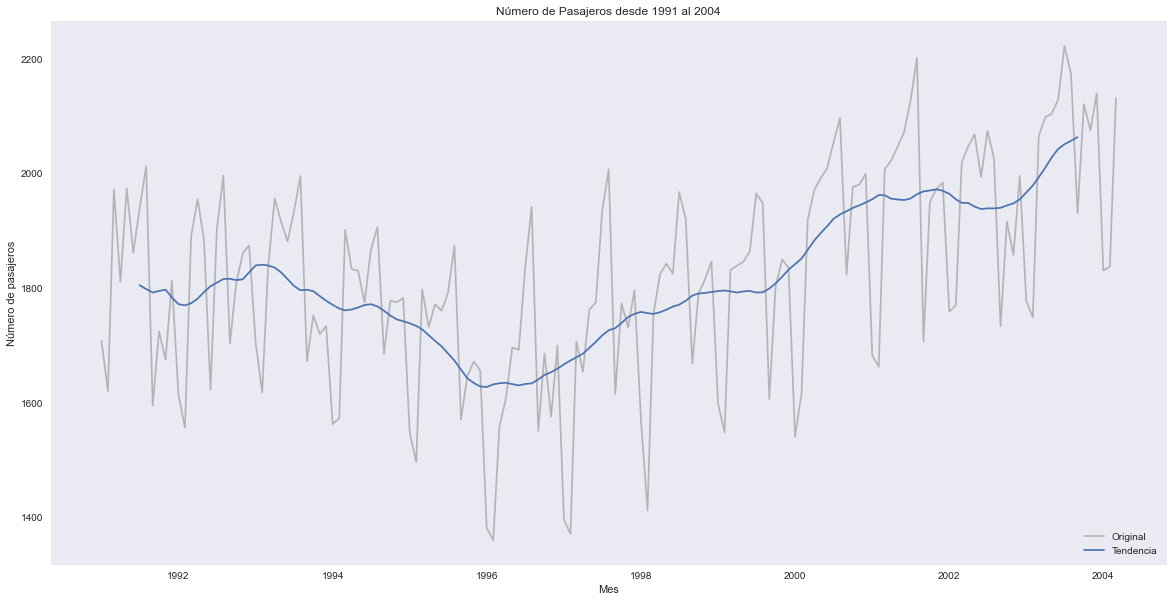

In [46]:
fig, ax = plt.subplots()
ax.set_title("Número de Pasajeros desde 1991 al 2004")
ax.plot(amtrak_ds.Ridership, label="Original", color='.5', alpha=.5)
ax.set_ylabel("Número de pasajeros")
ax.set_xlabel("Mes")
# agregamos la tendencia
ax.plot(classic_fit.trend, label="Tendencia")
ax.legend(loc="lower right")
ax.grid()

Podemos observar que la tendencia tiene un comportamiento de curva que tiende a subir ligeramente confome pasa el tiempo. La componente estacional claramente se observa ese patrón repetitivo en cada año (cada 12 meses). Finalmente tenemos la componente iiregular (residual) donde observamos esos valores cambiantes en la serie.

Debido a que identificamos un comportamiento aditivo en en la estacionalidad de la serie de tiempo, podemos utilizar la siguiente ecuación para la misma:

$$
Y = T + S + I
$$

Por lo que si queremos reconstruir los datos originales a partir de las componentes, podemos utilizar la formula descrita.

Text(0, 0.5, 'Pasajeros')

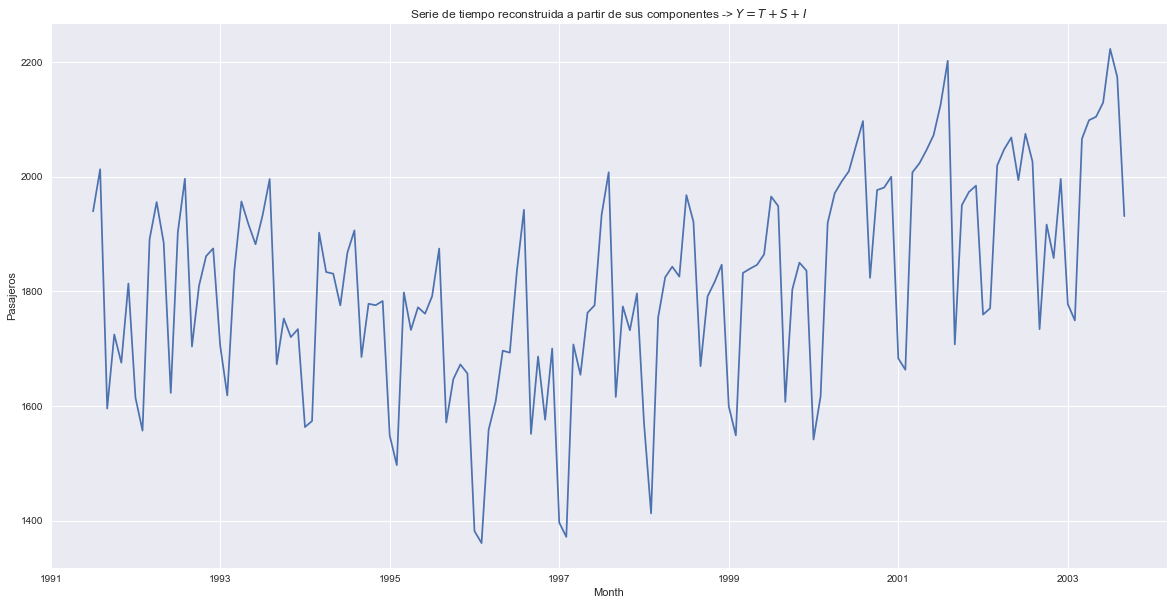

In [47]:
reconstruct = classic_fit.trend + classic_fit.seasonal + classic_fit.resid 
ax = reconstruct.plot(title="Serie de tiempo reconstruida a partir de sus componentes -> $Y = T + S +I$")
ax.set_ylabel("Pasajeros")